In [77]:
import MySQLdb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

conn = MySQLdb.connect(host="localhost", user="mb2", passwd="HanSolo1", db="sp18i501_6")
cursor = conn.cursor()

def genFits(xVals, yVals, degrees):
    models = []
    for d in degrees:
        model = np.polyfit(xVals, yVals, d)
        models.append(model)
    return models

def rSquared(observed, predicted):
    error = ((predicted - observed)**2).sum()
    meanError = error/len(observed)
    return 1 - (meanError/np.var(observed))
    
def testFits(models, degrees, xVals, yVals):
    plt.plot(xVals, yVals, 'o', label='Data')
    for i in range(len(models)):
        estYVals = np.polyval(models[i], xVals)
        error = rSquared(yVals, estYVals)
        plt.plot(xVals, estYVals, label='Fit of degree ' + str(degrees[i]) + ', R2 = ' + str(round(error, 5)))

def predictedValue(year, model):
    degree = len(model[0])-1
    value = 0
    for i in model[0]:
        if degree == 0:
            value += i
        else:
            value += i * year**degree
        degree -= 1
    return value

Max number of sets produced in a year: 713 occured in year 2014
Min number of sets produced in a year: 3 occured in year 1960


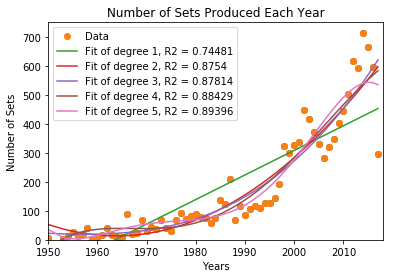

In [80]:
#Regression analysis for the number of sets produced each year
cursor.execute("SELECT year, COUNT(name) FROM sets_complete GROUP BY year")

rows =cursor.fetchall()

data=sorted(rows, key=lambda year: year[0])

years = []
counts = []

for element in data:    
    year = element[0]
    count = element[1]
    years.append(year)
    counts.append(count)

print("Max number of sets produced in a year:", int(max(counts)), "occured in year", years[counts.index(max(counts))])
print("Min number of sets produced in a year:", int(min(counts)), "occured in year", years[counts.index(min(counts))])

plt.plot(years, counts, 'o')
plt.axis([1950,2018,0,750])
plt.title("Number of Sets Produced Each Year")
plt.xlabel('Years')
plt.ylabel("Number of Sets",labelpad=5)

degrees = [1,2,3,4, 5]
models = genFits(years, counts, degrees)
testFits(models, degrees, years, counts)

plt.legend(loc='best')
plt.savefig('SetsPerYear_AllFits.png')
plt.show()

Predicted number of sets for 2018: 647


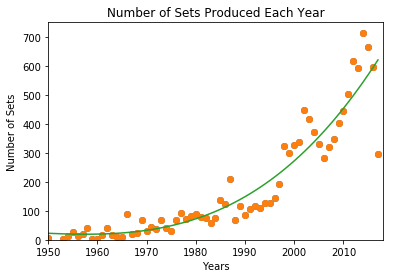

In [79]:
#Graphing the 3rd degree polynomial line fit to the data
cursor.execute("SELECT year, COUNT(name) FROM sets_complete GROUP BY year")

rows =cursor.fetchall()

data=sorted(rows, key=lambda year: year[0])

years = []
counts = []

for element in data:    
    year = element[0]
    count = element[1]
    years.append(year)
    counts.append(count)

plt.plot(years, counts, 'o')
plt.axis([1950,2018,0,750])
plt.title("Number of Sets Produced Each Year")
plt.xlabel('Years')
plt.ylabel("Number of Sets",labelpad=5)

degrees = [4]
models = genFits(years, counts, degrees)
testFits(models, degrees, years, counts)

print("Predicted number of sets for 2018:", int(predictedValue(2018, models)))

plt.savefig('SetsPerYear_ExponentialFit.png')
plt.show()

Max average number of parts: 260 occured in year 2017
Min average number of parts: 10 occured in year 1950


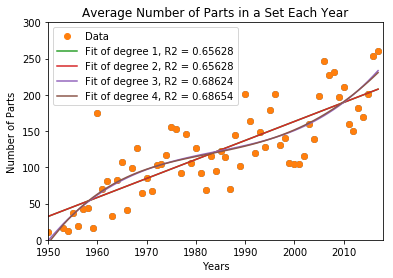

In [57]:
#Regression analysis of the average number of parts in a set each year
cursor.execute("SELECT year, SUM(num_parts), COUNT(name) FROM sets_complete GROUP BY year")

rows =cursor.fetchall()

data=sorted(rows, key=lambda year: year[0])

years = []
avg_partnum_per_set = []

for element in data:    
    year = element[0]
    partCount = element[1]
    setCount = element[2]
    years.append(year)
    avg_partnum_per_set.append(float(partCount / setCount))

print("Max average number of parts:", int(max(avg_partnum_per_set)), "occured in year", years[avg_partnum_per_set.index(max(avg_partnum_per_set))])
print("Min average number of parts:", int(min(avg_partnum_per_set)), "occured in year", years[avg_partnum_per_set.index(min(avg_partnum_per_set))])

plt.plot(years, avg_partnum_per_set, 'o')
plt.axis([1950,2018,0,300])
plt.title("Average Number of Parts in a Set Each Year")
plt.xlabel('Years')
plt.ylabel("Number of Parts",labelpad=5)

degrees = [1,2,3,4]
models = genFits(years, avg_partnum_per_set, degrees)
testFits(models, degrees, years, avg_partnum_per_set)

plt.legend(loc='best')
plt.savefig('AvgPartsInASetPerYear_AllFits.png')
plt.show()

Predicted average number of parts in each set for 2018: 241


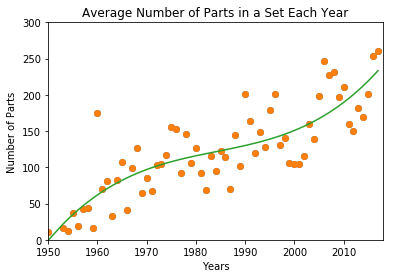

In [78]:
#Graphing the 3rd degree polynomial line fit to the data for the average number of parts in a set each year
cursor.execute("SELECT year, SUM(num_parts), COUNT(name) FROM sets_complete GROUP BY year")

rows =cursor.fetchall()

data=sorted(rows, key=lambda year: year[0])

years = []
avg_partnum_per_set = []

for element in data:    
    year = element[0]
    partCount = element[1]
    setCount = element[2]
    years.append(year)
    avg_partnum_per_set.append(float(partCount / setCount))

plt.plot(years, avg_partnum_per_set, 'o')
plt.axis([1950,2018,0,300])
plt.title("Average Number of Parts in a Set Each Year")
plt.xlabel('Years')
plt.ylabel("Number of Parts",labelpad=5)

degrees = [3]
models = genFits(years, avg_partnum_per_set, degrees)
testFits(models, degrees, years, avg_partnum_per_set)

print("Predicted average number of parts in each set for 2018:", int(predictedValue(2018, models)))

plt.savefig('AvgPartsInASetPerYear_ExponentialFit.png')
plt.show()

Max number of themes produced in a year: 34 occured in year 2016
Min number of themes produced in a year: 1 occured in year 1955


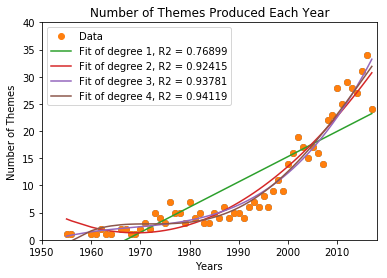

In [59]:
#Regression analysis of the number of themes produced each year
cursor.execute("SELECT year, count(DISTINCT t.id) FROM sets_complete s INNER JOIN themes t ON s.theme_id = t.id WHERE parent_id = '' GROUP BY year")

rows =cursor.fetchall()

data=sorted(rows, key=lambda year: year[0])

years = []
themeCount = []

for element in data:    
    year = element[0]
    count = element[1]
    years.append(year)
    themeCount.append(count)

print("Max number of themes produced in a year:", int(max(themeCount)), "occured in year", years[themeCount.index(max(themeCount))])
print("Min number of themes produced in a year:", int(min(themeCount)), "occured in year", years[themeCount.index(min(themeCount))])

plt.plot(years, themeCount, 'o')
plt.axis([1950,2018,0,40])
plt.title("Number of Themes Produced Each Year")
plt.xlabel('Years')
plt.ylabel("Number of Themes",labelpad=5)

degrees = [1,2,3,4]
models = genFits(years, themeCount, degrees)
testFits(models, degrees, years, themeCount)

plt.legend(loc='best')
plt.savefig('ThemesPerYear_AllFits.png')
plt.show()

0.00023209211543522216
-1.3703902244384463
2697.2415971506407
-1769646.9066713054
Predicted number of themes for 2018: 34


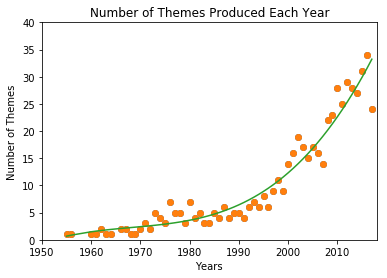

In [76]:
#Graphing the 3rd degree polynomial line fit to the data of the number of themes produced each year
cursor.execute("SELECT year, count(DISTINCT t.id) FROM sets_complete s INNER JOIN themes t ON s.theme_id = t.id WHERE parent_id = '' GROUP BY year")

rows =cursor.fetchall()

data=sorted(rows, key=lambda year: year[0])

years = []
themeCount = []

for element in data:    
    year = element[0]
    count = element[1]
    years.append(year)
    themeCount.append(count)

plt.plot(years, themeCount, 'o')
plt.axis([1950,2018,0,40])
plt.title("Number of Themes Produced Each Year")
plt.xlabel('Years')
plt.ylabel("Number of Themes",labelpad=5)

degrees = [3]
models = genFits(years, themeCount, degrees)
testFits(models, degrees, years, themeCount)

print("Predicted number of themes for 2018:", int(predictedValue(2018, models)))

plt.savefig('ThemesPerYear_ExponentialFit.png')
plt.show()

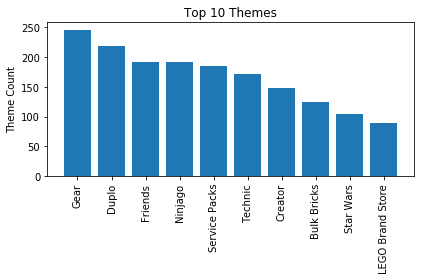

In [39]:
#Selecting the top 10 most common themes
cursor.execute("SELECT t.name, count(s.theme_id) FROM sets_complete s INNER JOIN themes t ON s.theme_id = t.id WHERE parent_id = '' GROUP BY t.name ORDER BY count(s.theme_id) DESC LIMIT 10")

rows =cursor.fetchall()

themeNames = []
themeCount = []

for element in rows:    
    names = element[0]
    count = element[1]
    themeNames.append(names)
    themeCount.append(float(count))

x = np.arange(10)
plt.bar(themeNames, themeCount)
plt.xticks(rotation="vertical")
plt.ylabel("Theme Count")
plt.title("Top 10 Themes")
plt.tight_layout()
plt.savefig('Top10Themes.png', dpi=100)
plt.show()